<a href="https://colab.research.google.com/github/Fedesin/Challenge-ML/blob/main/Colab_challenge_meli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
! pip install kaggle
!pip install pycountry pycountry-convert pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 41.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 234.7/234.7 kB 15.2 MB/s eta 0:00:00


In [28]:
!pip install transformers torch spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir ~/.kaggle

In [3]:
! cp /content/drive/MyDrive/"Challenge ML"/Kaggle_API/kaggle.json ~/.kaggle/

cp: cannot stat '/content/drive/MyDrive/Challenge ML/Kaggle_API/kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download konradb/atticus-open-contract-dataset-aok-beta

Dataset URL: https://www.kaggle.com/datasets/konradb/atticus-open-contract-dataset-aok-beta
License(s): Attribution 4.0 International (CC BY 4.0)
 81% 83.0M/102M [00:00<00:00, 161MB/s]
100% 102M/102M [00:00<00:00, 163MB/s] 


In [6]:
! unzip atticus-open-contract-dataset-aok-beta.zip

Archive:  atticus-open-contract-dataset-aok-beta.zip
  inflating: CUAD_v1/CUAD_v1.json    
  inflating: CUAD_v1/CUAD_v1_README.txt  
  inflating: CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/CreditcardscomInc_20070810_S-1_EX-10.33_362297_EX-10.33_Affiliate Agreement.pdf  
  inflating: CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605784_EX-10.27_Affiliate Agreement.pdf  
  inflating: CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/DigitalCinemaDestinationsCorp_20111220_S-1_EX-10.10_7346719_EX-10.10_Affiliate Agreement.pdf  
  inflating: CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/LinkPlusCorp_20050802_8-K_EX-10_3240252_EX-10_Affiliate Agreement.pdf  
  inflating: CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/SouthernStarEnergyInc_20051202_SB-2A_EX-9_801890_EX-9_Affiliate Agreement.pdf  
  inflating: CUAD_v1/full_contract_pdf/Part_I/Affiliate_Agreements/SteelVaultCorp_20081224_10-K_EX-10.16_3074935_EX-10

In [62]:
import os
import pandas as pd
import numpy as np
import re
import pycountry
import pycountry_convert as pc


In [63]:
import logging
import os

# Definir la ruta para el archivo de log
log_filename = "/content/etl_process.log"

# Eliminar el archivo de log si existe (para iniciar desde cero)
if os.path.exists(log_filename):
    os.remove(log_filename)

# Crear el logger raíz
logger = logging.getLogger()
logger.setLevel(logging.INFO)  # Configurar nivel de logging

# Eliminar cualquier manejador existente
if logger.hasHandlers():
    logger.handlers.clear()

# Crear un manejador para la consola
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.INFO)

# Crear un manejador para el archivo de log
file_handler = logging.FileHandler(log_filename, mode='w')
file_handler.setLevel(logging.INFO)

# Crear un formato común para ambos manejadores
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(formatter)
file_handler.setFormatter(formatter)

# Agregar los manejadores al logger raíz
logger.addHandler(console_handler)
logger.addHandler(file_handler)

# Generar mensajes de log de prueba
logger.info("Inicio del proceso ETL.")
#logger.warning("Este es un mensaje de advertencia.")
#logger.error("Este es un mensaje de error.")
#logger.info("Proceso ETL completado.")

# Mostrar el contenido del archivo log creado para verificar
!cat /content/etl_process.log

2024-10-06 20:13:44,838 - INFO - Inicio del proceso ETL.


2024-10-06 20:13:44,838 - INFO - Inicio del proceso ETL.


In [64]:
dataset_path = '/content/CUAD_v1/'
master_csv_path = os.path.join(dataset_path, 'master_clauses.csv') #Extract

In [65]:
print(os.listdir(dataset_path))

['CUAD_v1_README.txt', 'full_contract_txt', 'master_clauses.csv', 'full_contract_pdf', 'CUAD_v1.json', 'label_group_xlsx']


In [66]:
df_master = pd.read_csv(master_csv_path)
logging.info("Cargando dataset desde el archivo master_clauses.csv...")

2024-10-06 20:13:50,261 - INFO - Cargando dataset desde el archivo master_clauses.csv...


In [67]:
print(df_master.head())
print(df_master.columns)
print(f"El DataFrame tiene {df_master.shape[0]} filas y {df_master.shape[1]} columnas.")

                                            Filename  \
0  CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...   
1  EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B...   
2  FulucaiProductionsLtd_20131223_10-Q_EX-10.9_83...   
3  GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10...   
4  IdeanomicsInc_20160330_10-K_EX-10.26_9512211_E...   

                                    Document Name  \
0               ['MARKETING AFFILIATE AGREEMENT']   
1   ['VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT']   
2  ['CONTENT DISTRIBUTION AND LICENSE AGREEMENT']   
3           ['WEBSITE CONTENT LICENSE AGREEMENT']   
4                   ['CONTENT LICENSE AGREEMENT']   

                         Document Name-Answer  \
0               MARKETING AFFILIATE AGREEMENT   
1   VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT   
2  CONTENT DISTRIBUTION AND LICENSE AGREEMENT   
3           WEBSITE CONTENT LICENSE AGREEMENT   
4                   CONTENT LICENSE AGREEMENT   

                                             Part

In [68]:
#Observo las primeras filas del DataFrame para verificar que este todo en orden
print("Primeras filas del DataFrame limpio:")
print(df_master.head())

# Mostrar algunas filas de cada columna clave para revisar contenido
print("Contenido de 'Parties-Answer':")
print(df_master['Parties-Answer'].head(10))

print("Contenido de 'Agreement Date-Answer':")
print(df_master['Agreement Date-Answer'].head(10))

print("Contenido de 'Renewal Term-Answer':")
print(df_master['Renewal Term-Answer'].head(10))

print("Contenido de 'Governing Law-Answer':")
print(df_master['Governing Law-Answer'].head(10))

Primeras filas del DataFrame limpio:
                                            Filename  \
0  CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...   
1  EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B...   
2  FulucaiProductionsLtd_20131223_10-Q_EX-10.9_83...   
3  GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10...   
4  IdeanomicsInc_20160330_10-K_EX-10.26_9512211_E...   

                                    Document Name  \
0               ['MARKETING AFFILIATE AGREEMENT']   
1   ['VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT']   
2  ['CONTENT DISTRIBUTION AND LICENSE AGREEMENT']   
3           ['WEBSITE CONTENT LICENSE AGREEMENT']   
4                   ['CONTENT LICENSE AGREEMENT']   

                         Document Name-Answer  \
0               MARKETING AFFILIATE AGREEMENT   
1   VIDEO-ON-DEMAND CONTENT LICENSE AGREEMENT   
2  CONTENT DISTRIBUTION AND LICENSE AGREEMENT   
3           WEBSITE CONTENT LICENSE AGREEMENT   
4                   CONTENT LICENSE AGREEMENT   

            

Fase de Transformación, vamos a comenzar limpiando las columnas que coinsideramos claves para responder las preguntas del challenge.

In [69]:
# Seleccionar solo las columnas necesarias para el análisis
columnas_importantes = [
    'Filename',  # Para tener referencia del nombre del archivo
    'Parties-Answer',  # Proveedores involucrados
    'Agreement Date-Answer',  # Fecha de firma del contrato
    'Effective Date-Answer',  # Fecha en que el contrato se vuelve efectivo
    'Expiration Date-Answer',  # Fecha de expiración del contrato
    'Renewal Term-Answer',  # Plazo de renovación del contrato
    'Governing Law-Answer'  # País cuya ley rige el contrato
]

In [70]:
# Crear un nuevo DataFrame con las columnas seleccionadas
df_filtrado = df_master[columnas_importantes].copy()

# Mostrar las primeras filas del DataFrame filtrado para verificar
print("Primeras filas del DataFrame filtrado:")
print(df_filtrado.head())

Primeras filas del DataFrame filtrado:
                                            Filename  \
0  CybergyHoldingsInc_20140520_10-Q_EX-10.27_8605...   
1  EuromediaHoldingsCorp_20070215_10SB12G_EX-10.B...   
2  FulucaiProductionsLtd_20131223_10-Q_EX-10.9_83...   
3  GopageCorp_20140221_10-K_EX-10.1_8432966_EX-10...   
4  IdeanomicsInc_20160330_10-K_EX-10.26_9512211_E...   

                                      Parties-Answer Agreement Date-Answer  \
0  Birch First Global Investments Inc. ("Company"...                5/8/14   
1  Rogers Cable Communications Inc. ("Rogers"); E...               7/11/06   
2  CONVERGTV, INC. (“ConvergTV”); Fulucai Product...              11/15/12   
3  PSiTech Corporation ("Licensor"); Empirical Ve...               2/10/14   
4  Beijing Sun Seven Stars Culture Development Li...              12/21/15   

  Effective Date-Answer Expiration Date-Answer    Renewal Term-Answer  \
0                   NaN               12/31/14      successive 1 year   
1        

In [71]:
#Verificacion del DataFrame filtrado
print("Contenido de 'Parties-Answer' (primeras 10 filas):")
print(df_filtrado['Parties-Answer'].head(10))

print("Contenido de 'Agreement Date-Answer' (primeras 10 filas):")
print(df_filtrado['Agreement Date-Answer'].head(10))

print("Contenido de 'Effective Date-Answer' (primeras 10 filas):")
print(df_filtrado['Effective Date-Answer'].head(10))

print("Contenido de 'Renewal Term-Answer' (primeras 10 filas):")
print(df_filtrado['Renewal Term-Answer'].head(10))

print("Contenido de 'Governing Law-Answer' (primeras 10 filas):")
print(df_filtrado['Governing Law-Answer'].head(10))

Contenido de 'Parties-Answer' (primeras 10 filas):
0    Birch First Global Investments Inc. ("Company"...
1    Rogers Cable Communications Inc. ("Rogers"); E...
2    CONVERGTV, INC. (“ConvergTV”); Fulucai Product...
3    PSiTech Corporation ("Licensor"); Empirical Ve...
4    Beijing Sun Seven Stars Culture Development Li...
5    RSL COM PrimeCall, Inc. ("PrimeCall"); deltath...
6    WOMEN.COM NETWORKS, INC. ("Women.com"); EDIETS...
7    INTEGRITY INCORPORATED ("Integrity"); TIME LIF...
8    Marine MP, LLC (“Lender”); Arnold Schwarzenegg...
9    Skype Communications, S.A. ("Skype"); Skype Te...
Name: Parties-Answer, dtype: object
Contenido de 'Agreement Date-Answer' (primeras 10 filas):
0      5/8/14
1     7/11/06
2    11/15/12
3     2/10/14
4    12/21/15
5     10/1/99
6     5/22/00
7     1/10/00
8     7/26/13
9     8/22/05
Name: Agreement Date-Answer, dtype: object
Contenido de 'Effective Date-Answer' (primeras 10 filas):
0         NaN
1     7/11/06
2    11/15/12
3     2/10/14
4    12/

Limpieza

In [72]:

# Mostrar la cantidad de filas antes del filtrado
filas_antes = len(df_filtrado)
print(f"Cantidad de filas antes del filtrado: {filas_antes}")

# Paso 1: Reemplazar valores nulos en 'Parties-Answer' con cadenas vacías
df_filtrado['Parties-Answer'] = df_filtrado['Parties-Answer'].fillna('')

# Paso 2: Filtrar filas donde 'Parties-Answer' esté vacía o contenga listas vacías
# Esto conserva la columna 'Parties-Answer' tal como está y solo elimina las filas vacías
df_filtrado = df_filtrado[df_filtrado['Parties-Answer'].apply(lambda x: x.strip() != '')]

# Mostrar la cantidad de filas después del filtrado
filas_despues = len(df_filtrado)
print(f"Cantidad de filas después del filtrado: {filas_despues}")

# Mostrar las primeras filas después del filtrado para confirmar
print("Primeras filas de 'Parties-Answer' después de filtrar filas vacías:\n", df_filtrado['Parties-Answer'].head(10))


Cantidad de filas antes del filtrado: 510
Cantidad de filas después del filtrado: 509
Primeras filas de 'Parties-Answer' después de filtrar filas vacías:
 0    Birch First Global Investments Inc. ("Company"...
1    Rogers Cable Communications Inc. ("Rogers"); E...
2    CONVERGTV, INC. (“ConvergTV”); Fulucai Product...
3    PSiTech Corporation ("Licensor"); Empirical Ve...
4    Beijing Sun Seven Stars Culture Development Li...
5    RSL COM PrimeCall, Inc. ("PrimeCall"); deltath...
6    WOMEN.COM NETWORKS, INC. ("Women.com"); EDIETS...
7    INTEGRITY INCORPORATED ("Integrity"); TIME LIF...
8    Marine MP, LLC (“Lender”); Arnold Schwarzenegg...
9    Skype Communications, S.A. ("Skype"); Skype Te...
Name: Parties-Answer, dtype: object


In [73]:
# Mostrar las primeras filas del DataFrame original antes de la limpieza
print("Primeras filas del DataFrame original antes de la limpieza:\n")
print(df_filtrado[['Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer']].head(10))

logging.info(f"Comenzando la limpieza de las columnas 'Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer'")

# Función para limpiar y estandarizar las fechas al formato 'MM/DD/YYYY'
def limpiar_y_transformar_fecha(fecha):
    # Comprobación inicial de valor nulo
    if pd.isnull(fecha) or fecha == 'nan' or fecha == '':
        return np.nan

    # Convertir a string y eliminar espacios en blanco
    fecha = str(fecha).strip()
    print(f"Valor original recibido: {fecha}")  # Imprimir el valor recibido para diagnóstico

    # Manejar valores como 'perpetual' o 'indefinite'
    if 'perpetual' in fecha.lower() or 'indefinite' in fecha.lower():
        return '12/31/2099'

    # Reemplazar cualquier '[]' o valores no válidos por NaN
    if re.search(r'\[\]', fecha) or fecha in ['[]/[]/[]', '[]']:
        print("Valor no válido detectado y descartado: NaN")
        return np.nan

    # Manejar fechas con formato M/D/YY o M/DD/YY o MM/DD/YY
    try:
        # Detectar si la fecha tiene solo dos dígitos para el año y determinar el siglo correspondiente
        match = re.match(r'(\d{1,2})/(\d{1,2})/(\d{2})$', fecha)
        if match:
            mes, dia, anio = match.groups()
            anio = int(anio)
            # Determinar el siglo basado en el valor del año (asumiendo 50 como punto de corte)
            if anio <= 50:
                anio = f'20{anio:02d}'  # Convertir el año '20' -> '2020'
            else:
                anio = f'19{anio:02d}'  # Convertir el año '99' -> '1999'

            fecha = f"{mes}/{dia}/{anio}"
            print(f"Fecha ajustada a formato MM/DD/YYYY: {fecha}")

        # Convertir la fecha al formato 'MM/DD/YYYY' usando pd.to_datetime
        fecha_estandarizada = pd.to_datetime(fecha, format='%m/%d/%Y', errors='coerce')
        if pd.isnull(fecha_estandarizada):
            print(f"Error al convertir la fecha: {fecha}")
            return np.nan

        # Devolver la fecha en el formato correcto
        return fecha_estandarizada.strftime('%m/%d/%Y')
    except Exception as e:
        print(f"Excepción al limpiar la fecha {fecha}: {e}")
        return np.nan

# Aplicar la limpieza a las columnas de fecha
columnas_fecha = ['Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer']
for col in columnas_fecha:
    print(f"\nAplicando limpieza a la columna: {col}")
    df_filtrado[col] = df_filtrado[col].apply(limpiar_y_transformar_fecha)

# Mostrar cantidad de valores nulos después de la limpieza
print("\nCantidad de valores nulos en cada columna después de la limpieza:")
print(df_filtrado[columnas_fecha].isnull().sum())

# Filtrar filas con valores nulos en cualquier columna de fechas
print("\nFiltrando filas con valores nulos en cualquier columna de fechas...")
df_filtrado = df_filtrado.dropna(subset=columnas_fecha, how='any')

df_filtrado = df_filtrado[df_filtrado['Expiration Date-Answer'] >= df_filtrado['Effective Date-Answer']]

# Verificar el resultado después de la limpieza y filtrado
print("\nPrimeras filas después de la limpieza y filtrado de fechas:")
print(df_filtrado[['Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer']].head(15))

# Mostrar cuántos valores nulos quedaron en cada columna después de la limpieza y filtrado
print("\nCantidad de valores nulos en cada columna después de la limpieza y filtrado:")
print(df_filtrado[columnas_fecha].isnull().sum())

2024-10-06 20:14:10,129 - INFO - Comenzando la limpieza de las columnas 'Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer'


Primeras filas del DataFrame original antes de la limpieza:

  Agreement Date-Answer Effective Date-Answer Expiration Date-Answer
0                5/8/14                   NaN               12/31/14
1               7/11/06               7/11/06                6/30/10
2              11/15/12              11/15/12                    NaN
3               2/10/14               2/10/14                2/10/19
4              12/21/15              12/21/15               12/21/35
5               10/1/99               10/1/99                10/1/02
6               5/22/00               5/22/00                5/22/02
7               1/10/00                   NaN               12/31/04
8               7/26/13               7/26/13                7/22/16
9               8/22/05               8/22/05                8/22/10

Aplicando limpieza a la columna: Agreement Date-Answer
Valor original recibido: 5/8/14
Fecha ajustada a formato MM/DD/YYYY: 5/8/2014
Valor original recibido: 7/11/06
Fecha ajustad

In [74]:
# Mostrar primeras filas del DataFrame original (df_master) antes de la limpieza
print("Primeras filas del DataFrame original (df_master):\n")
print(df_master[['Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer']].head(10))

# Mostrar primeras filas del DataFrame después de la limpieza (df_filtrado)
print("\nPrimeras filas del DataFrame después de la limpieza (df_filtrado):\n")
print(df_filtrado[['Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer']].head(10))


Primeras filas del DataFrame original (df_master):

  Agreement Date-Answer Effective Date-Answer Expiration Date-Answer
0                5/8/14                   NaN               12/31/14
1               7/11/06               7/11/06                6/30/10
2              11/15/12              11/15/12                    NaN
3               2/10/14               2/10/14                2/10/19
4              12/21/15              12/21/15               12/21/35
5               10/1/99               10/1/99                10/1/02
6               5/22/00               5/22/00                5/22/02
7               1/10/00                   NaN               12/31/04
8               7/26/13               7/26/13                7/22/16
9               8/22/05               8/22/05                8/22/10

Primeras filas del DataFrame después de la limpieza (df_filtrado):

   Agreement Date-Answer Effective Date-Answer Expiration Date-Answer
3             02/10/2014            02/10/2014    

In [75]:
# Limpieza y estandarización de 'Renewal Term-Answer' con manejo de fechas combinadas
logging.info(f"Comenzando la limpieza de la columna 'Renewal Term-Answer'")
def limpiar_renewal_term(term):
    # Si es nulo o vacío, retornar 0 (indicando que no tiene término de renovación)
    if pd.isnull(term) or term == '':
        return 0

    # Convertir 'perpetual' a un valor muy alto (e.g., 999 meses) para referencia
    if 'perpetual' in term.lower():
        return 999  # Valor arbitrario muy alto para indicar 'perpetual'

    # Manejar casos donde hay dos fechas combinadas (e.g., '7/22/2019; 7/22/2022')
    if re.match(r'\d{1,2}/\d{1,2}/\d{4}; \d{1,2}/\d{1,2}/\d{4}', term):
        # Dividir las dos fechas
        fechas = term.split(';')
        try:
            # Convertir ambas fechas a datetime
            fecha_inicio = pd.to_datetime(fechas[0].strip(), format='%m/%d/%Y')
            fecha_fin = pd.to_datetime(fechas[1].strip(), format='%m/%d/%Y')
            # Calcular la diferencia en meses
            meses = (fecha_fin.year - fecha_inicio.year) * 12 + (fecha_fin.month - fecha_inicio.month)
            return meses
        except ValueError:
            return 0  # Si hay un error en la conversión de fechas, retornar 0 (sin término de renovación)

    # Buscar números y convertir a meses (asumiendo que si está en "year" se multiplica por 12)
    match = re.search(r'(\d+)\s*year', term.lower())  # Buscar términos como "1 year", "2 years"
    if match:
        return int(match.group(1)) * 12  # Convertir a meses

    # Buscar términos como "1 month", "3 months" y mantener en meses
    match = re.search(r'(\d+)\s*month', term.lower())
    if match:
        return int(match.group(1))  # Mantener en meses

    # Retornar 0 si el término no cumple con ninguna condición conocida
    return 0

# Crear una copia del DataFrame para la limpieza
df_filtrado_original = df_filtrado.copy()

# Aplicar la función de limpieza a la copia del DataFrame
df_filtrado_original['Renewal Term-Answer'] = df_filtrado_original['Renewal Term-Answer'].apply(limpiar_renewal_term)

# Filtrar filas con valor 0 en 'Renewal Term-Answer'
df_filtrado_original = df_filtrado_original[df_filtrado_original['Renewal Term-Answer'] != 0]

# Mostrar las primeras filas para verificar la limpieza de 'Renewal Term-Answer'
print("Primeras filas de 'Renewal Term-Answer' después de la limpieza en df_filtrado_original:")
print(df_filtrado_original['Renewal Term-Answer'].head(10))
print("Valores únicos en 'Renewal Term-Answer' después de la limpieza en df_filtrado_original:")
print(df_filtrado_original['Renewal Term-Answer'].unique())


2024-10-06 20:14:19,042 - INFO - Comenzando la limpieza de la columna 'Renewal Term-Answer'


Primeras filas de 'Renewal Term-Answer' después de la limpieza en df_filtrado_original:
3     36
6     12
9     36
15    36
18    60
20    12
26    12
44    60
53    12
54    36
Name: Renewal Term-Answer, dtype: int64
Valores únicos en 'Renewal Term-Answer' después de la limpieza en df_filtrado_original:
[ 36  12  60 120 999  24  48   1   6]


In [76]:
import pycountry
import pycountry_convert as pc

logging.info(f"Comenzando la limpieza de la columna 'Governing Law-Answer")

# Paso 1: Extraer los valores únicos de la columna 'Governing Law-Answer'
valores_unicos_gob_law = df_filtrado_original['Governing Law-Answer'].dropna().unique()
print(f"Valores únicos en la columna 'Governing Law-Answer' antes de la corrección:\n{valores_unicos_gob_law}")

# Paso 2: Crear un diccionario de mapeo manual para traducir cada valor a su país correspondiente
# (Basado en los valores observados y la lógica de correspondencia)
mapeo_a_paises = {
    'Nevada': 'United States',
    'Ontario, Canada': 'Canada',
    'Florida': 'United States',
    'California': 'United States',
    'England, United Kingdom; Wales, United Kingdom': 'United Kingdom',
    'Ohio': 'United States',
    'Texas': 'United States',
    'Michigan': 'United States',
    'Israel': 'Israel',
    'Delaware': 'United States',
    'Alabama': 'United States',
    'New York': 'United States',
    'Spain': 'Spain',
    'Virginia': 'United States',
    'Kansas': 'United States',
    'England': 'United Kingdom',
    'Pennsylvania': 'United States',
    'Virginia, Texas': 'United States',
    'Arizona': 'United States',
    'United States': 'United States',
    'Hong Kong': 'Hong Kong',
    'Illinois': 'United States',
    'Massachusetts': 'United States',
    'Beijing': 'China',
    'Oklahoma': 'United States',
    'New Jersey': 'United States',
    'Papua New Guinea': 'Papua New Guinea',
    'Wisconsin': 'United States',
    'British Columbia, Canada': 'Canada',
    'Colorado': 'United States',
    'Arkansas': 'United States',
    'Republic of Kazakhstan': 'Kazakhstan',
    'North Carolina': 'United States',
    'Missouri': 'United States',
    'Washington': 'United States',
    'Connecticut': 'United States',
    'Delaware, Illinois': 'United States',
    'Nova Scotia, Canada': 'Canada',
    'Kentucky': 'United States',
    'Federal Republic of Germany': 'Germany',
    'England; Wales': 'United Kingdom',
    'THE STATE IN WHICH THE FRANCHISED RESTAURANT IS LOCATED; THE UNITED STATES TRADEMARK ACT OF 1946': 'United States',
    '[]': None,  # Valor vacío o no válido
    'nan': None,  # Valor vacío o no válido
    'Unknown': None,  # Valor vacío o no válido
}

# Definir la función para obtener el continente basándose en el nombre del país
def obtener_continente_simplificado(pais):
    # Verificar si el nombre del país está vacío o es None
    if pd.isnull(pais) or pais == '':
        return None

    try:
        # Obtener el código ISO Alpha-2 del país
        codigo_pais = pycountry.countries.lookup(pais).alpha_2

        # Obtener el código del continente basado en el código del país
        codigo_continente = pc.country_alpha2_to_continent_code(codigo_pais)

        # Convertir el código del continente a un nombre legible
        nombre_continente = pc.convert_continent_code_to_continent_name(codigo_continente)

        # Simplificar el nombre del continente para que se vea más claro
        return nombre_continente
    except Exception as e:
        print(f"Error al obtener continente para el país '{pais}': {e}")
        return None


# Paso 3: Aplicar el mapeo para corregir la columna 'Country' basándonos en 'Governing Law-Answer'
df_filtrado_original['Country'] = df_filtrado_original['Governing Law-Answer'].map(mapeo_a_paises)

# Mostrar los valores únicos de 'Country' después de aplicar el mapeo
print("\nValores únicos de 'Country' después de la corrección:")
print(df_filtrado_original['Country'].unique())

# Paso 4: Aplicar la función para obtener el continente simplificado en la columna 'Country'
df_filtrado_original['Continent'] = df_filtrado_original['Country'].apply(obtener_continente_simplificado)

# Paso 5: Eliminar filas con valores nulos en 'Country' o 'Continent'
df_filtrado_original = df_filtrado_original.dropna(subset=['Country', 'Continent'])

# Mostrar las primeras filas después de la eliminación de nulos
print("\nPrimeras filas del DataFrame después de eliminar nulos en 'Country' y 'Continent':")
print(df_filtrado_original[['Governing Law-Answer', 'Country', 'Continent']].head(20))

# Mostrar valores únicos de 'Country' y 'Continent' después de la corrección y eliminación
print("\nPaíses únicos en la columna 'Country' después de la corrección y eliminación de nulos:")
print(df_filtrado_original['Country'].unique())

print("\nContinentes únicos en la columna 'Continent' después de la corrección y eliminación de nulos:")
print(df_filtrado_original['Continent'].unique())

# Mostrar el total de filas en el DataFrame después de la corrección y eliminación de nulos
print(f"\nTotal de filas en el DataFrame después de la corrección y eliminación de nulos: {df_filtrado_original.shape[0]}")


2024-10-06 20:14:22,643 - INFO - Comenzando la limpieza de la columna 'Governing Law-Answer


Valores únicos en la columna 'Governing Law-Answer' antes de la corrección:
['Nevada' 'California' 'England, United Kingdom; Wales, United Kingdom'
 'Florida' 'Texas' 'Michigan' 'Israel' 'New York' 'England' 'Pennsylvania'
 'Virginia' 'Arizona' 'United States' 'Hong Kong' 'Illinois' 'Oklahoma'
 'New Jersey' 'Papua New Guinea' 'Wisconsin' 'British Columbia, Canada'
 'Colorado' 'Ohio' 'North Carolina' 'Missouri' 'Delaware'
 'Ontario, Canada' 'Connecticut' 'England; Wales']

Valores únicos de 'Country' después de la corrección:
['United States' 'United Kingdom' 'Israel' nan 'Hong Kong'
 'Papua New Guinea' 'Canada']

Primeras filas del DataFrame después de eliminar nulos en 'Country' y 'Continent':
                              Governing Law-Answer         Country  \
3                                           Nevada   United States   
6                                       California   United States   
9   England, United Kingdom; Wales, United Kingdom  United Kingdom   
15              

In [77]:
# 1. Verificar existencia de valores nulos en cada columna clave
print("Número de valores nulos por columna en el DataFrame filtrado:")
print(df_filtrado_original.isnull().sum())

Número de valores nulos por columna en el DataFrame filtrado:
Filename                  0
Parties-Answer            0
Agreement Date-Answer     0
Effective Date-Answer     0
Expiration Date-Answer    0
Renewal Term-Answer       0
Governing Law-Answer      0
Country                   0
Continent                 0
dtype: int64


Verificación final de columnas limpias

In [78]:
# Verificación 1: Revisar tipos de datos de cada columna
print("\nTipos de datos de cada columna en el DataFrame:")
print(df_filtrado_original.dtypes)

# Verificación 2: Mostrar valores únicos para las columnas importantes
print("\nValores únicos de la columna 'Continent':")
print(df_filtrado_original['Continent'].unique())

print("\nValores únicos de la columna 'Country':")
print(df_filtrado_original['Country'].unique())

print("\nValores únicos de la columna 'Renewal Term-Answer':")
print(df_filtrado_original['Renewal Term-Answer'].unique())

# Verificación 3: Estadísticas descriptivas para columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas (e.g., 'Renewal Term-Answer'):")
print(df_filtrado_original[['Renewal Term-Answer']].describe())

# Verificación 4: Mostrar 5 filas aleatorias para verificar datos
print("\nMuestra aleatoria de 5 filas del DataFrame filtrado:")
print(df_filtrado_original.sample(5))


Tipos de datos de cada columna en el DataFrame:
Filename                  object
Parties-Answer            object
Agreement Date-Answer     object
Effective Date-Answer     object
Expiration Date-Answer    object
Renewal Term-Answer        int64
Governing Law-Answer      object
Country                   object
Continent                 object
dtype: object

Valores únicos de la columna 'Continent':
['North America' 'Europe' 'Asia' 'Oceania']

Valores únicos de la columna 'Country':
['United States' 'United Kingdom' 'Israel' 'Hong Kong' 'Papua New Guinea'
 'Canada']

Valores únicos de la columna 'Renewal Term-Answer':
[ 36  12  60 120 999  24  48   1   6]

Estadísticas descriptivas para columnas numéricas (e.g., 'Renewal Term-Answer'):
       Renewal Term-Answer
count            87.000000
mean             91.770115
std             249.396887
min               1.000000
25%              12.000000
50%              12.000000
75%              36.000000
max             999.000000

Muestra al

Load

In [79]:
#Guardo el dataframe ya limpio y transformado a un csv nuevo
df_filtrado_original.to_csv('dataset_limpio.csv', index=False)
logging.info("Se creo dataset limpio")
print("El DataFrame limpio ha sido guardado como 'dataset_limpio.csv'.")

2024-10-06 20:14:36,288 - INFO - Se creo dataset limpio


El DataFrame limpio ha sido guardado como 'dataset_limpio.csv'.


Hora de hacer las preguntas con el dataframe ya procesado y limpio.

Implementación de Modelo de Lenguaje para Resolver la Pregunta de los Proveedores

Primeras filas del dataset original:
 0    PSiTech Corporation ("Licensor"); Empirical Ve...
1    WOMEN.COM NETWORKS, INC. ("Women.com"); EDIETS...
2    Skype Communications, S.A. ("Skype"); Skype Te...
3    B & C General Warehouse Corporation LLC ("Comp...
4    WATER NOW, INC.; ("Water Now"); Hydraspin USA,...
5    Eco Science Solutions, Inc ("ESSI"); Stephen M...
6    VITALIBIS INC ("Licensee"); VOTOCAST, Inc. ("V...
7    Todos Medical Ltd. ("Todos"); Care G. B. Plus ...
8    BookingEntertainment.com ("Promoter"); VNUE, I...
9    SIGA TECHNOLOGIES, INC. ("SIGA"); MERIDIAN MED...
Name: Parties-Answer, dtype: object
Primeras filas después de expandir:
 0                                  PSiTech Corporation
0                              Empirical Ventures, Inc
1                             WOMEN.COM NETWORKS, INC.
1                                     EDIETS.COM, INC.
2                           Skype Communications, S.A.
2                             Skype Technologies, S.A.
2        

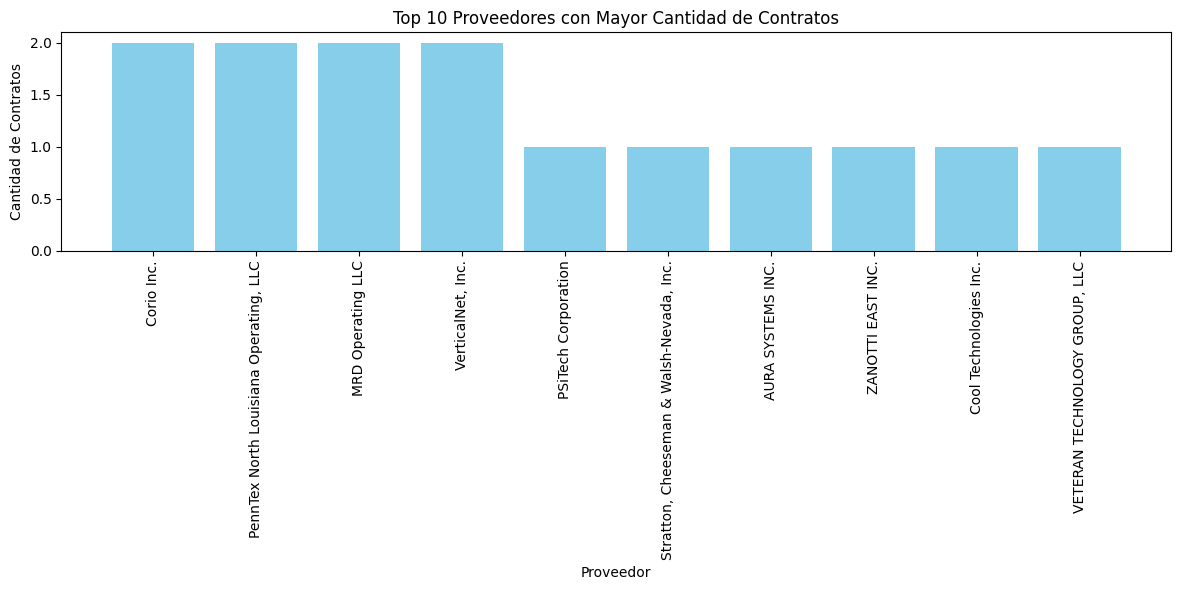

In [82]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import re

# Cargar el modelo de spaCy para la identificación de organizaciones (entidades tipo ORG)
nlp = spacy.load("en_core_web_sm")

#df_original = pd.read_csv(master_csv_path)
df_original = pd.read_csv("dataset_limpio.csv")
# Mostrar las primeras filas para verificar la estructura
print("Primeras filas del dataset original:\n", df_original['Parties-Answer'].head(10))

# Asegurarse de que la columna 'Parties-Answer' no tenga valores nulos
df_original['Parties-Answer'] = df_original['Parties-Answer'].fillna('')

# Función para dividir y limpiar los proveedores usando delimitador ";"
def dividir_proveedores_original(proveedores):
    if isinstance(proveedores, str):
        # Dividir por el delimitador principal ";"
        proveedores_list = proveedores.split(';')

        # Eliminar contenido entre paréntesis y caracteres adicionales (como corchetes, etc.)
        proveedores_limpios = [
            re.sub(r'\(.*?\)', '', proveedor).strip()  # Eliminar todo lo que esté entre paréntesis
            for proveedor in proveedores_list
            if proveedor.strip() and proveedor.strip() not in ['', '[]']  # Excluir vacíos y listas vacías
        ]
        return proveedores_limpios
    return []

# Aplicar la función de limpieza y separación a la columna 'Parties-Answer'
df_original['Proveedores_Limpios'] = df_original['Parties-Answer'].apply(dividir_proveedores_original)

# Expandir las filas para tener cada proveedor en una fila separada
df_proveedores = df_original.explode('Proveedores_Limpios')

# Filtrar filas donde 'Proveedores_Limpios' esté vacío o contenga '[]'
df_proveedores = df_proveedores[df_proveedores['Proveedores_Limpios'].notnull() &
                                (df_proveedores['Proveedores_Limpios'] != '') &
                                (df_proveedores['Proveedores_Limpios'] != '[]')]

# Mostrar las primeras filas después de expandir
print("Primeras filas después de expandir:\n", df_proveedores['Proveedores_Limpios'].head(10))

# Contar la frecuencia de cada proveedor limpio
proveedor_frecuencia = df_proveedores['Proveedores_Limpios'].value_counts().reset_index()
proveedor_frecuencia.columns = ['Proveedor', 'Cantidad de Contratos']

# Obtener el número máximo de contratos
max_contratos = proveedor_frecuencia['Cantidad de Contratos'].max()

# Filtrar los proveedores que tienen el número máximo de contratos
proveedores_max_contratos = proveedor_frecuencia[proveedor_frecuencia['Cantidad de Contratos'] == max_contratos]

# Mostrar todos los proveedores con el número máximo de contratos
proveedores_con_mas_contratos = ', '.join(proveedores_max_contratos['Proveedor'].tolist())
print(f"\nProveedores con más contratos asociados: {proveedores_con_mas_contratos}, cada uno con {max_contratos} contratos.")

# Graficar los 10 proveedores con mayor cantidad de contratos
plt.figure(figsize=(12, 6))
plt.bar(proveedor_frecuencia['Proveedor'][:10], proveedor_frecuencia['Cantidad de Contratos'][:10], color='skyblue')
plt.title('Top 10 Proveedores con Mayor Cantidad de Contratos')
plt.xlabel('Proveedor')
plt.ylabel('Cantidad de Contratos')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()
plt.show()


2024-10-06 20:18:03,061 - INFO - Cargando dataset desde el archivo dataset_limpio.csv...


Plazo de renovación más breve: 1 meses.
Cantidad de contratos con plazo mínimo: 4
Plazo de renovación más extenso: 999 meses.
Cantidad de contratos con plazo máximo: 6


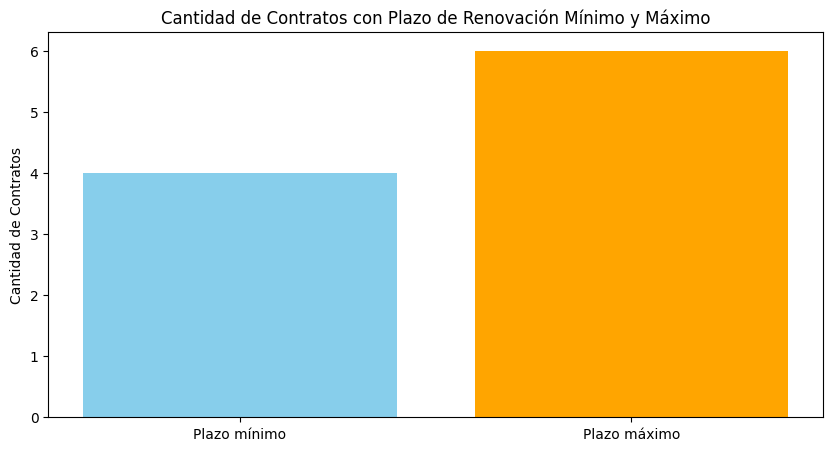

Fecha de comienzo efectivo más antigua: 04/15/1994
Cantidad de contratos que comienzan en la fecha más antigua: 1


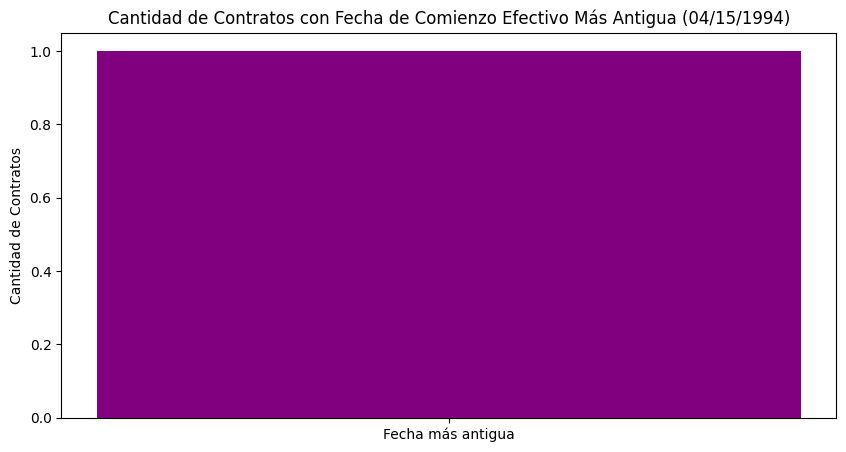

Top 10 Países con mayor cantidad de contratos:
Country
United States       77
United Kingdom       3
Canada               3
Israel               2
Hong Kong            1
Papua New Guinea     1
Name: count, dtype: int64



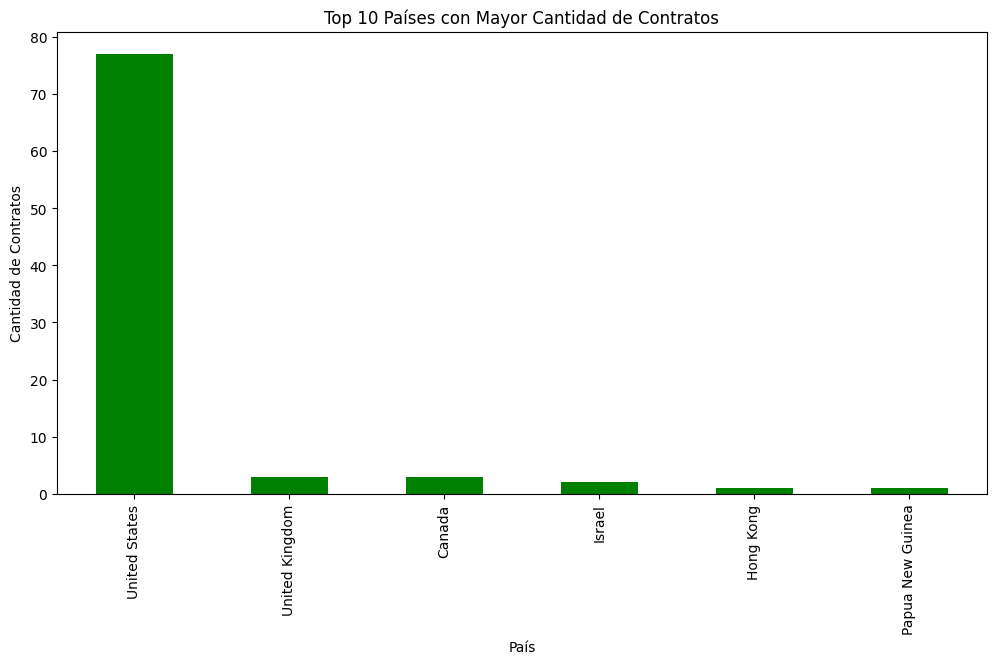

Distribución de contratos que expiran por mes:
Mes Expiración
1995-04    1
1997-03    1
1998-12    1
1999-06    1
1999-10    1
          ..
2028-10    1
2029-03    1
2030-06    1
2030-12    1
2099-12    6
Freq: M, Name: count, Length: 72, dtype: int64

Distribución de contratos que expiran por año:
Año Expiración
1995    1
1997    1
1998    1
1999    2
2000    6
2001    3
2002    1
2003    1
2004    4
2005    3
2006    5
2007    2
2008    2
2009    3
2010    4
2011    2
2012    2
2013    2
2014    2
2015    3
2016    2
2017    1
2018    2
2019    6
2020    2
2021    3
2022    2
2023    3
2024    5
2028    2
2029    1
2030    2
2099    6
Name: count, dtype: int64

Generando gráfico de distribución de contratos que expiran por año:


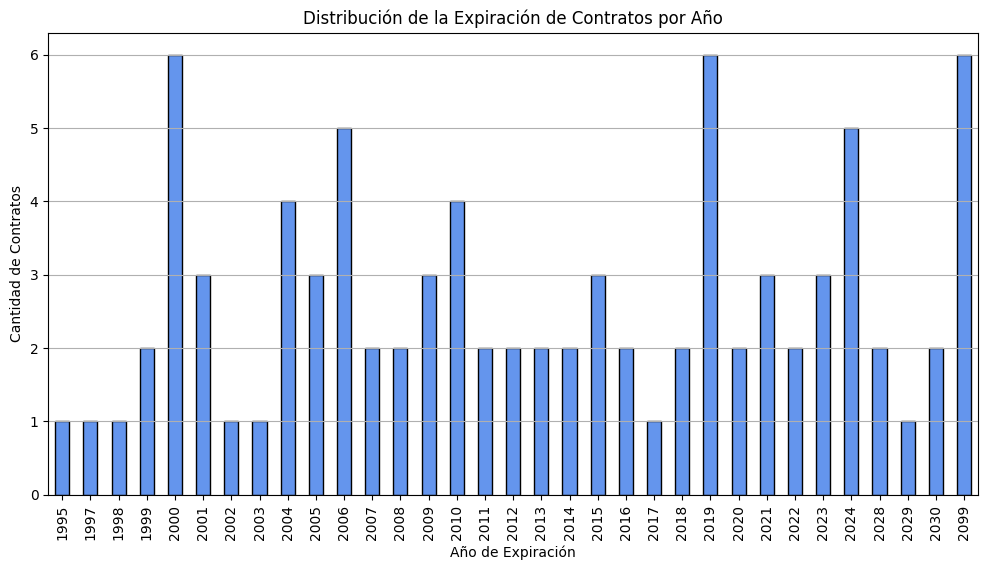

In [84]:
# Importar matplotlib para gráficos
import matplotlib.pyplot as plt
import pandas as pd
import logging

# Configurar logging
logging.basicConfig(filename='etl_process.log', level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logging.info("Cargando dataset desde el archivo dataset_limpio.csv...")

# Cargar el CSV generado como un nuevo DataFrame para el análisis
df_limpio = pd.read_csv("dataset_limpio.csv")


# Convertir columnas de fechas a formato datetime para cálculos y evitar errores
for col in ['Agreement Date-Answer', 'Effective Date-Answer', 'Expiration Date-Answer']:
    df_limpio[col] = pd.to_datetime(df_limpio[col], format='%m/%d/%Y', errors='coerce')

# Obtener el plazo de renovación más breve y más extenso
plazo_min = df_limpio['Renewal Term-Answer'].min()
plazo_max = df_limpio['Renewal Term-Answer'].max()

# Filtrar los contratos que cumplen con el plazo de renovación más breve y más extenso
contratos_plazo_min = df_limpio[df_limpio['Renewal Term-Answer'] == plazo_min]
contratos_plazo_max = df_limpio[df_limpio['Renewal Term-Answer'] == plazo_max]

# Mostrar la información de los contratos con plazo mínimo y máximo
print(f"Plazo de renovación más breve: {plazo_min} meses.")
print(f"Cantidad de contratos con plazo mínimo: {len(contratos_plazo_min)}")
print(f"Plazo de renovación más extenso: {plazo_max} meses.")
print(f"Cantidad de contratos con plazo máximo: {len(contratos_plazo_max)}")

# Graficar contratos con plazo de renovación mínimo y máximo
plt.figure(figsize=(10, 5))
plt.bar(['Plazo mínimo', 'Plazo máximo'], [len(contratos_plazo_min), len(contratos_plazo_max)], color=['skyblue', 'orange'])
plt.title('Cantidad de Contratos con Plazo de Renovación Mínimo y Máximo')
plt.ylabel('Cantidad de Contratos')
plt.show()

# Fecha más antigua en la columna 'Effective Date-Answer'
fecha_mas_antigua = df_limpio['Effective Date-Answer'].min()

# Verificar que 'fecha_mas_antigua' no sea NaT (valor nulo después de convertir a datetime)
if pd.notnull(fecha_mas_antigua):
    contratos_fecha_mas_antigua = df_limpio[df_limpio['Effective Date-Answer'] == fecha_mas_antigua]
    print(f"Fecha de comienzo efectivo más antigua: {fecha_mas_antigua.strftime('%m/%d/%Y')}")
    print(f"Cantidad de contratos que comienzan en la fecha más antigua: {len(contratos_fecha_mas_antigua)}")

    # Graficar la cantidad de contratos que inician en la fecha más antigua
    plt.figure(figsize=(10, 5))
    plt.bar(['Fecha más antigua'], [len(contratos_fecha_mas_antigua)], color='purple')
    plt.title(f'Cantidad de Contratos con Fecha de Comienzo Efectivo Más Antigua ({fecha_mas_antigua.strftime("%m/%d/%Y")})')
    plt.ylabel('Cantidad de Contratos')
    plt.show()
else:
    print("Error: No se encontró ninguna fecha válida en la columna 'Effective Date-Answer'.")

# Contar la frecuencia de cada país en la columna 'Country'
pais_frecuencia = df_limpio['Country'].value_counts().head(10)  # Tomar los 10 países más frecuentes

# Mostrar la frecuencia de los países
print(f"Top 10 Países con mayor cantidad de contratos:\n{pais_frecuencia}\n")

# Graficar la frecuencia de los países con más contratos
plt.figure(figsize=(12, 6))
pais_frecuencia.plot(kind='bar', color='green')
plt.title('Top 10 Países con Mayor Cantidad de Contratos')
plt.ylabel('Cantidad de Contratos')
plt.xlabel('País')
plt.show()


# Asegurarnos de que no existan valores nulos en 'Expiration Date-Answer'
df_limpio = df_limpio[df_limpio['Expiration Date-Answer'].notnull()]

# Extraer el año y el mes de la columna de expiración
df_limpio['Año Expiración'] = df_limpio['Expiration Date-Answer'].dt.year
df_limpio['Mes Expiración'] = df_limpio['Expiration Date-Answer'].dt.to_period('M')  # Convertir a formato Year-Month

# Contar la cantidad de contratos que expiran en cada mes
expiraciones_por_mes = df_limpio['Mes Expiración'].value_counts().sort_index()

# Contar la cantidad de contratos que expiran en cada año
expiraciones_por_año = df_limpio['Año Expiración'].value_counts().sort_index()

# Mostrar en consola la información obtenida para ver los datos
print("Distribución de contratos que expiran por mes:")
print(expiraciones_por_mes)

print("\nDistribución de contratos que expiran por año:")
print(expiraciones_por_año)


# Graficar la distribución de expiraciones por año
print("\nGenerando gráfico de distribución de contratos que expiran por año:")
plt.figure(figsize=(12, 6))
expiraciones_por_año.plot(kind='bar', color='cornflowerblue', edgecolor='black')
plt.title('Distribución de la Expiración de Contratos por Año')
plt.xlabel('Año de Expiración')
plt.ylabel('Cantidad de Contratos')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

